In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#### Obtenha o dataset do repositório da Universidade de California em Irvine

In [2]:
iris = load_iris()
iris_dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
X = iris_dataset.drop('target', axis=1)
Y = iris_dataset['target']

#### Efetue a partição do tipo Holdout 80/20 do dataset

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### Utilize o Sci-kit Learn e proponha seis Redes Neurais Artificiais distintas para este problema

In [4]:
neural_nets = []
for i in range(3):
    neural_nets.append(MLPClassifier(hidden_layer_sizes=(1,), learning_rate_init=0.002, batch_size=1,\
                       activation='logistic',max_iter=50))
for i in range(3):
    neural_nets.append(MLPClassifier(hidden_layer_sizes=(2,), learning_rate_init=0.0015, batch_size=1,\
                       activation='relu',max_iter=50))

#### Treine as redes propostas com os dados de treinamento

In [5]:
for neural_net in neural_nets:
    neural_net.fit(X_train, Y_train)

C:\Users\Ocean\Anaconda2\envs\py36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Teste as redes e obtenha a acurácia e o F1-Score para os dados de teste

In [12]:
cont, y_preds = 1, []

for neural_net in neural_nets:
    y_pred = neural_net.predict(X_test)
    print("Rede Neural {}\nAcurácia: {}\nF1-Score: {}\n".format(cont,accuracy_score(Y_test, y_pred),f1_score(Y_test,y_pred,\
                                                                                                          average='micro')))
    y_preds.append(y_pred)
    cont += 1

Rede Neural 1
Acurácia: 0.8
F1-Score: 0.8000000000000002

Rede Neural 2
Acurácia: 0.8666666666666667
F1-Score: 0.8666666666666667

Rede Neural 3
Acurácia: 0.7333333333333333
F1-Score: 0.7333333333333333

Rede Neural 4
Acurácia: 0.9
F1-Score: 0.9

Rede Neural 5
Acurácia: 0.3333333333333333
F1-Score: 0.3333333333333333

Rede Neural 6
Acurácia: 0.9333333333333333
F1-Score: 0.9333333333333333



#### A partir do F1-Score, elenque a melhor rede para o problema e imprima sua matriz de confusão

In [13]:
highest_f1_score = {'neural-net': 0, 'f1-score': f1_score(Y_test, y_preds[0], average='micro')}

for i,y_pred in enumerate(y_preds):
    if (f1_score(Y_test, y_pred, average='micro') > highest_f1_score['f1-score']):
        highest_f1_score['neural-net'] = i
        highest_f1_score['f1-score'] = f1_score(Y_test, y_pred, average='micro')

print('Melhor Rede Neural para o problema: {}\nF1-score: {}'.format(highest_f1_score['neural-net'] + 1,\
                                                                    highest_f1_score['f1-score']))

Melhor Rede Neural para o problema: 6
F1-score: 0.9333333333333333


#### Matriz de confusão para os dados de teste

In [8]:
confusion_matrix(Y_test, y_preds[highest_f1_score['neural-net']])

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]], dtype=int64)

#### Com os dados de F1-Score de todas as Redes Neurais treinadas e testadas, responda:

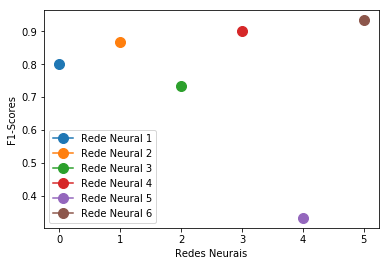

In [16]:
f1_scores = [f1_score(Y_test, y_pred, average='micro') for y_pred in y_preds]

for i, f1 in enumerate(f1_scores):
    plt.plot(i, f1, marker='o', ms=10, label='Rede Neural {}'.format(i+1))
plt.xlabel('Redes Neurais')
plt.ylabel('F1-Scores')
plt.legend()
plt.show()

#### O desempenho das diferentes RNAs neste problema foi homogêneo ou heterogênero?

O desempenho nas diferentes RNAs foram heterogênero, pois de acordo com o gráfico, pode-se notar que as posições de cada círculo estão em diferentes posições e valores quando comparadas ao F1-Score.

#### A RNA com mais neurônios ocultos é essencialmente a melhor?

Não necessariamente, pois pode variar com os valores aleatórios, então em um momento pode ser melhor em outros não, por exemplo o pior F1-Score das RNAs, foi uma RNA com dois neurônios ocultos.

#### As RNAs com uma única camada oculta tiveram F1-Score médio, igual ou superior ao das redes com duas camadas ocultas? Isso ocorre em todo problema?

As RNAs com uma única camada oculta tiveram F1-Score médio comparada com as RNAs com duas camadas ocultas, nessa situação. Ao fazer uma outra partição e treina-las e testa-las novamente, pode ser que fique igual, superior ou médio comparada as RNAs com duas camadas ocultas.